<a href="https://colab.research.google.com/github/mounikanaidu135/Mobile-Phone-Detection-YOLOv8/blob/main/Mobile_Phone_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [20]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
from google.colab import files

Saving m2.jpg to m2 (7).jpg

image 1/1 /content/m2 (7).jpg: 448x640 2 persons, 2 cell phones, 958.3ms
Speed: 5.1ms preprocess, 958.3ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
✅ Mobile phone detected in: m2 (7).jpg


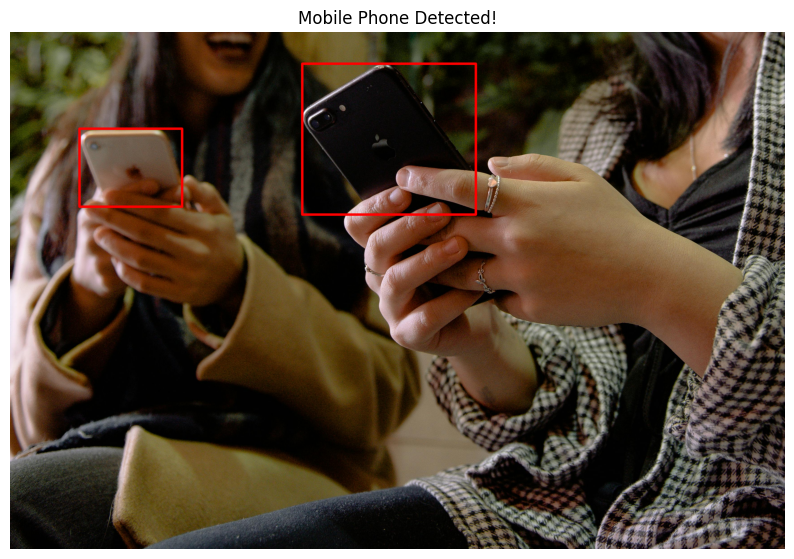

In [22]:

# Upload images
uploaded = files.upload()

# Load bigger pre-trained model
model = YOLO('yolov8m.pt')

# Loop through uploaded files
for filename in uploaded.keys():
    results = model.predict(source=filename, conf=0.5, save=False)

    for result in results:
        has_phone = False

        # Load image
        img = cv2.imread(filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        boxes = result.boxes

        for box in boxes:
            class_id = int(box.cls)
            conf = box.conf[0]
            class_name = model.names[class_id]

            if class_name == 'cell phone':
                has_phone = True

                # Get box coordinates
                x1, y1, x2, y2 = map(int, box.xyxy[0])

                # Draw bounding box
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 9)


        if has_phone:
            print(f"✅ Mobile phone detected in: {filename}")

            plt.figure(figsize=(10, 10))
            plt.imshow(img)
            plt.title("Mobile Phone Detected!")
            plt.axis('off')
            plt.show()
        else:
            print(f"❌ No mobile phone detected in: {filename}")
